# Noisification

In [1]:
import numpy as np
import pandas as pd
from ztfrapid import ztf_rapid

You will need to install 'emcee' if you wish to train your own classifier on new data.


In [2]:
lc_data_orig = pd.read_pickle('/home/nmiranda/workspace/ztf_rapid/data/raw/rcf_marshallc_sncosmo_200114_2018classupdate_addedcv.pkl')

In [3]:
datasets = np.load('/home/nmiranda/workspace/ztf_rapid/data/interim/test_noisify/test_noisify.npz', allow_pickle=True)

In [4]:
lc_data = ztf_rapid.noisify_dataset(datasets['objids_train'], datasets['labels_train'], lc_data_orig, elem_per_class=100)

In [5]:
datasets_aug = ztf_rapid.make_datasets(lc_data, '/tmp/', split_data=False)

akpnyt_BY8HCHZOGS light curve 0 of 1
No data for passband:  i
Preparing 1_ZTF19abfwdyt_X6ECJ4LHVE light curve 0 of 1
No data for passband:  i
Preparing 2_ZTF19abcejlb_6K8ACCYHAR light curve 0 of 1
No data for passband:  i
Preparing 3_ZTF18aapzqup_NBXYE1G2GB light curve 0 of 1
No data for passband:  i
Preparing 2_ZTF19aawfkeg_JV69RO7WQD light curve 0 of 1
No data for passband:  i
Preparing 3_ZTF18aaakpsa_H9QWZ3QCQV light curve 0 of 1
No data for passband:  i
Preparing 2_ZTF18abjkryl_WH2GYGLWC0 light curve 0 of 1
No data for passband:  i
Preparing 2_ZTF18acebssa_8BK7EVL284 light curve 0 of 1
No data for passband:  i
Preparing 1_ZTF19actldas_G5WASXJTSH light curve 0 of 1
No data for passband:  i
Preparing 1_ZTF19acwrujg_QUOTVURNPU light curve 0 of 1
No data for passband:  i
Preparing 1_ZTF19acykjcw_IZEU4XWA0M light curve 0 of 1
No data for passband:  i
Preparing 2_ZTF18acqppuj_XABBQP6SXP light curve 0 of 1
No data for passband:  i
Preparing 1_ZTF18abdrmin_CIS5FUQ6C1 light curve 0 of 1
No 

In [6]:
datasets_aug.keys()

dict_keys(['X', 'y', 'labels', 'class_names', 'class_weights', 'sample_weights', 'timesX', 'orig_lc', 'objids'])

In [7]:
list(datasets.keys())

['X_train',
 'X_test',
 'y_train',
 'y_test',
 'objids_test',
 'objids_train',
 'orig_lc_test',
 'orig_lc_train',
 'timesX_test',
 'class_names',
 'labels_train']

In [8]:
X_train = datasets_aug['X']
y_train = datasets_aug['y']
X_test = datasets['X_test']
y_test = datasets['y_test']

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(520, 150, 3)
(520, 150, 4)
(1540, 150, 3)
(1540, 150, 4)


In [10]:
datasets_aug['class_names']

['AGN', 'SN II', 'SN Ia']

In [11]:
idx = 0
datasets_aug['objids'][idx]

'1_ZTF18abcecfi_6YG9O1SJNL'

In [12]:
this_objid = 'ZTF19abfibel'

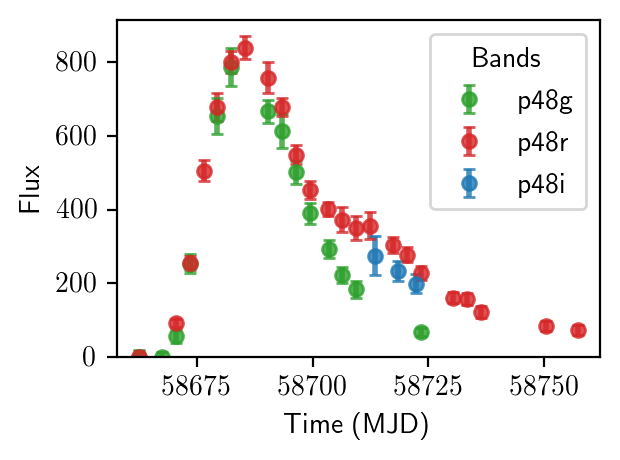

In [13]:
fig = ztf_rapid.plot_raw_lightcurve(lc_data_orig[this_objid])

In [14]:
fig.savefig('/home/nmiranda/workspace/ztf_rapid/reports/figures/ZTF19abfibel_pre_augmentation.svg')

In [15]:
for idx, objid in enumerate(datasets_aug['objids']):
    if this_objid in objid:
        break
idx_proc = idx

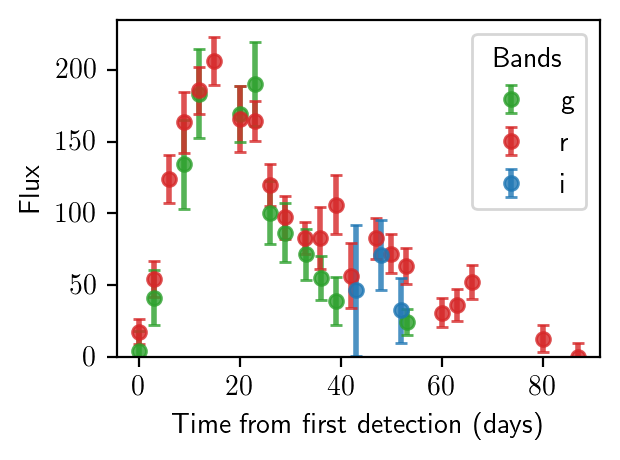

In [16]:
fig = ztf_rapid.plot_processed_lightcurve(datasets_aug['orig_lc'][idx_proc])

In [17]:
fig.savefig('/home/nmiranda/workspace/ztf_rapid/reports/figures/ZTF19abfibel_post_augmentation.svg')